In [24]:
! pip install scikit-learn

In [25]:
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import TimeSeriesSplit

In [26]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sentiment = pd.read_csv('sentiment_gpt4_only.csv')
metadata = pd.read_csv('metadata.csv')
train.head()
#Affiche le nombre de colonne et de ligne
train.shape

(416, 16)

In [28]:
train

,Date,target,CL=F,EURUSD=X,GC=F,HG=F,JPY=X,SI=F,XWD.TO,^DJI,^GSPC,^IXIC,^RUT,^TNX,^TYX,^VIX
0,2010-01-01,0,NaN,1.438994,NaN,NaN,92.919998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,1,81.510002,1.442398,1117.699951,3.3880,92.495003,17.440001,22.935871,10583.959961,1132.989990,2308.419922,640.099976,3.841,4.660,20.040001
2,2010-01-05,1,81.769997,1.436596,1118.099976,3.3960,91.584999,17.781000,22.945892,10572.019531,1136.520020,2308.709961,638.489990,3.755,4.593,19.350000
3,2010-01-06,1,83.180000,1.440403,1135.900024,3.4775,92.356003,18.163000,22.845692,10573.679688,1137.140015,2301.090088,637.950012,3.808,4.671,19.160000
4,2010-01-07,1,82.660004,1.431803,1133.099976,3.4115,93.389999,18.333000,22.905811,10606.860352,1141.689941,2300.050049,641.969971,3.822,4.689,19.059999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2011-08-01,0,94.889999,1.436369,1619.000000,4.4040,77.212997,39.298000,NaN,12132.490234,1286.939941,2744.610107,792.849976,2.740,4.071,23.660000
412,2011-08-02,1,93.790001,1.426208,1641.900024,4.3890,77.459999,40.081001,22.344688,11866.620117,1254.050049,2669.239990,767.010010,2.624,3.919,24.790001
413,2011-08-03,0,91.930000,1.417334,1663.400024,4.3200,77.334999,41.747002,22.344688,11896.440430,1260.339966,2693.070068,772.780029,2.599,3.873,23.379999
414,2011-08-04,0,86.629997,1.435297,1656.199951,4.2310,77.112000,39.417999,21.873747,11383.679688,1200.069946,2556.389893,726.799988,2.458,3.722,31.660000


<Axes: >

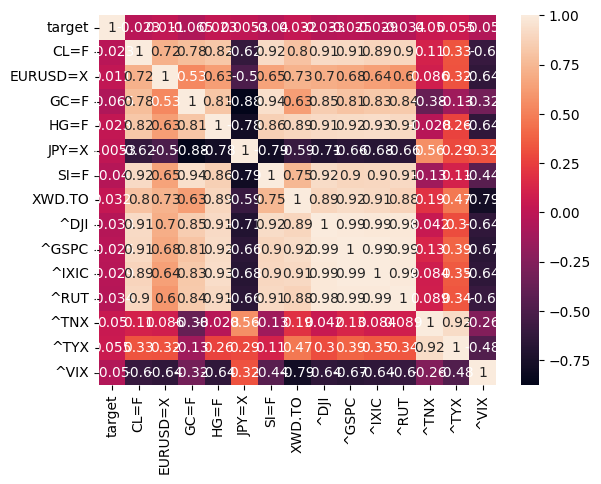

In [29]:
new_train = train.drop(columns=['Date'])
sns.heatmap(new_train.corr(), annot=True)

In [30]:
import yfinance as yf

# Get the data for Apple stock
apple = yf.Ticker("AAPL")

# Get the historical data for Apple stock
apple_history = apple.history(period="1d")

# Print the historical data
print(apple_history)
start_date = '2010-01-01'
end_date = '2011-12-31'

filtered_apple_history = apple_history.loc[start_date:end_date]
filtered_apple_history

                                 Open        High         Low       Close  \
Date                                                                        
2024-06-05 00:00:00-04:00  195.419998  196.419998  194.880005  195.369995   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-06-05 00:00:00-04:00  13512025        0.0           0.0  


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [31]:
 

startDate = dt.datetime(2010, 1, 1)
endDate = dt.datetime(2011, 8, 5)
for el in train.columns : 
    Index = el
    GetFacebookInformation = yf.Ticker(Index)
    SP500 = yf.Ticker("^GSPC")
    correlation = SP500.history(start=startDate,  end=endDate)['High'].corr(GetFacebookInformation.history(start=startDate,  end=endDate)['High'])
    print("Corrélation entre SP500 et ", Index," :", correlation)


$DATE: possibly delisted; No price data found  (1d 2010-01-01 00:00:00 -> 2011-08-05 00:00:00)
$TARGET: possibly delisted; No timezone found


$DATE: possibly delisted; No price data found  (1d 2010-01-01 00:00:00 -> 2011-08-05 00:00:00)
Corrélation entre SP500 et  Date  : nan
Corrélation entre SP500 et  target  : nan
Corrélation entre SP500 et  CL=F  : 0.9126376413967796
Corrélation entre SP500 et  EURUSD=X  : nan
Corrélation entre SP500 et  GC=F  : 0.820306790312629
Corrélation entre SP500 et  HG=F  : 0.9231909048381733
Corrélation entre SP500 et  JPY=X  : nan
Corrélation entre SP500 et  SI=F  : 0.9040174198203605
Corrélation entre SP500 et  XWD.TO  : 0.9422405755213042
Corrélation entre SP500 et  ^DJI  : 0.9919450019209338
Corrélation entre SP500 et  ^GSPC  : 1.0
Corrélation entre SP500 et  ^IXIC  : 0.9936245282009726
Corrélation entre SP500 et  ^RUT  : 0.9869413210403019
Corrélation entre SP500 et  ^TNX  : nan
Corrélation entre SP500 et  ^TYX  : nan
Corrélation entre SP500 et  ^VIX  : nan


In [32]:
Liste_ = []
Liste_ =['VTI','IVV', 'SPY','XLK','XLV', 'JNK', 'VNQ', 'AAPL', 'AMZN', 'XOM', 'SHEL', 'CVX'] #Liste des actions qu'on regarde

In [33]:
train_test = pd.read_csv('train.csv')       #On charge le fichier train pour modifier
for el in Liste_ :
    ticker  = yf.Ticker(el)
    dt = ticker.history(start='2010-1-1', end='2011-08-6')['Close'].to_frame()
    dt.index = dt.index.date
    # Create a new column for the date
    dt['Date'] = dt.index
    dt['Date'] = pd.to_datetime(dt['Date'])
    dt = dt.rename(columns={'Close': el})
    dt = dt.reset_index(drop=True)
    train_test['Date']= pd.to_datetime(train_test['Date'])
    train_test = pd.merge(train_test, dt, on='Date', how='left')
train_test 

,Date,target,CL=F,EURUSD=X,GC=F,HG=F,JPY=X,SI=F,XWD.TO,^DJI,...,SPY,XLK,XLV,JNK,VNQ,AAPL,AMZN,XOM,SHEL,CVX
0,2010-01-01,0,NaN,1.438994,NaN,NaN,92.919998,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,1,81.510002,1.442398,1117.699951,3.3880,92.495003,17.440001,22.935871,10583.959961,...,86.860077,18.996120,24.806654,47.240726,25.503168,6.461976,6.6950,39.913582,29.257704,44.538498
2,2010-01-05,1,81.769997,1.436596,1118.099976,3.3960,91.584999,17.781000,22.945892,10572.019531,...,87.089981,18.971624,24.563377,47.685230,25.474548,6.473149,6.7345,40.069439,29.290537,44.853973
3,2010-01-06,1,83.180000,1.440403,1135.900024,3.4775,92.356003,18.163000,22.845692,10573.679688,...,87.151299,18.759373,24.814501,47.841438,25.428747,6.370184,6.6125,40.415745,29.051231,44.859581
4,2010-01-07,1,82.660004,1.431803,1133.099976,3.4115,93.389999,18.333000,22.905811,10606.860352,...,87.519196,18.685915,24.900820,47.997623,25.703524,6.358406,6.5000,40.288769,28.910446,44.690605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2011-08-01,0,94.889999,1.436369,1619.000000,4.4040,77.212997,39.298000,NaN,12132.490234,...,101.577370,21.506058,27.072720,56.324070,36.270775,11.979763,11.0660,47.705288,36.876835,62.524857
412,2011-08-02,1,93.790001,1.426208,1641.900024,4.3890,77.459999,40.081001,22.344688,11866.620117,...,98.982338,21.055752,26.491550,55.609348,35.112427,11.743037,10.5850,46.650497,36.348213,61.379749
413,2011-08-03,0,91.930000,1.417334,1663.400024,4.3200,77.334999,41.747002,22.344688,11896.440430,...,99.518684,21.272573,26.539986,55.483238,34.822834,11.853550,10.4980,46.578590,35.736153,60.970322
414,2011-08-04,0,86.629997,1.435297,1656.199951,4.2310,77.112000,39.417999,21.873747,11383.679688,...,94.857086,20.413660,25.482580,53.801476,33.121521,11.394588,10.0740,44.253246,33.215893,57.457851


In [34]:
test_test = pd.read_csv('test.csv')       #On charge les données pour modifier le test

for el in Liste_ :
    ticker  = yf.Ticker(el)
    dt = ticker.history(start='2011-08-06', end='2011-12-30')['Close'].to_frame()
    dt.index = dt.index.date
    # Create a new column for the date
    dt['Date'] = dt.index
    dt['Date'] = pd.to_datetime(dt['Date'])
    dt = dt.rename(columns={'Close': el})
    dt = dt.reset_index(drop=True)
    test_test['Date']= pd.to_datetime(test_test['Date'])
    test_test = pd.merge(test_test, dt, on='Date', how='left')
test_test 

,Date,CL=F,EURUSD=X,GC=F,HG=F,JPY=X,SI=F,XWD.TO,^DJI,^GSPC,...,SPY,XLK,XLV,JNK,VNQ,AAPL,AMZN,XOM,SHEL,CVX
0,2011-08-08,81.309998,1.429409,1710.199951,3.9575,78.253998,39.374001,20.521042,10809.849609,1119.459961,...,88.546951,19.146137,24.360607,51.447060,29.489605,10.665083,9.6850,42.065754,30.865370,53.547794
1,2011-08-09,79.300003,1.417073,1740.000000,3.9670,77.584999,37.876999,21.162325,11239.769531,1172.530029,...,92.664322,20.021727,25.248495,52.820477,32.174316,11.293135,10.2545,42.934769,32.881565,55.416794
2,2011-08-10,82.889999,1.438311,1781.300049,3.8855,77.050003,39.325001,20.591183,10719.940430,1120.760010,...,88.570610,19.237867,24.183018,52.077724,31.432238,10.981526,9.7065,41.040497,31.554583,53.737667
3,2011-08-11,85.720001,1.412469,1748.800049,4.0045,76.759003,38.655998,21.412827,11143.309570,1172.640015,...,92.546005,19.971697,25.288853,52.974648,33.061184,11.283774,9.9180,43.182110,32.979290,55.814327
4,2011-08-12,85.379997,1.422637,1740.199951,4.0095,76.860001,39.101002,21.653307,11269.019531,1178.810059,...,93.169106,20.113451,25.539082,52.820477,33.055153,11.383115,10.1150,43.435474,33.761089,56.876366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2011-12-26,NaN,1.304495,NaN,NaN,78.080002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2011-12-27,101.339996,1.305057,1594.199951,3.4040,78.029999,28.697001,NaN,12291.349609,1265.430054,...,100.923294,21.522606,28.464815,55.994301,35.994106,12.275067,8.8135,51.753445,38.229366,65.091331
102,2011-12-28,99.360001,1.307207,1562.900024,3.3600,77.870003,27.191999,22.174349,12151.410156,1249.640015,...,99.598839,21.304012,28.154697,55.765713,35.562965,12.157611,8.6945,51.085903,37.599400,63.873646
103,2011-12-29,99.650002,1.292725,1539.900024,3.3655,77.945999,27.274000,22.134270,12287.040039,1263.020020,...,100.628090,21.463749,28.358732,56.056904,35.877079,12.232491,8.6930,51.747379,38.067970,64.783875


In [35]:
# test_test = test_test.to_csv('test_test.csv') 
# train_test = train_test.to_csv('train_test.csv')

In [36]:
from torchvision import datasets, models, transforms
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

In [ ]:
train_vrai = pd.read_csv('train_test.csv')
train_vrai = train_vrai.drop(columns=['Date'])
y_train = train_vrai['target']
train_vrai = train_vrai.drop(columns=['target'])
X_train_tensor = torch.tensor(train_vrai.values)
print(X_train_tensor)
y_train_tensor = torch.tensor(y_train.values)
y_train_tensor.unsqueeze_(1)

In [38]:
type(train_test)

pandas.core.frame.DataFrame

In [51]:
nb_col = len(train_test.columns) - 1
import torch.nn.functional as F
model = nn.Sequential(
    nn.Linear(nb_col,20),
    nn.ReLU(),
    nn.Linear(20,16),
    nn.ReLU(),
    nn.Linear(16,10),
    nn.ReLU(),
    nn.Linear(10,2),
    nn.Softmax(1))
# Utiliser le tenseur de probabilités pour effectuer une opération de sélection
    #return torch.argmax(probs, dim=1)[0].squeeze()


model 


Sequential(
  (0): Linear(in_features=27, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=2, bias=True)
  (7): Softmax(dim=1)
)

In [40]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [54]:
#Faisons un crossvalidation pour des séries temporelles
liste_index = [(100,140),(180,250),(300,350),(400,416)]
epoch = 10
tscv = TimeSeriesSplit(n_splits=5)
for _ in range(epoch):
    # for train_index, test_index in liste_index:
    #     X_train, X_test = train_vrai.iloc[train_index], train_vrai.iloc[test_index]
    #     y_train, y_test = y_train_tensor[train_index], y_train_tensor[test_index]
    #     X_train_tensor = torch.tensor(X_train.values)
    #     X_test_tensor = torch.tensor(X_test.values)
    #     y_train = y_train.float()
    #     y_test = y_test.float()
    #     optimizer.zero_grad()
    #     output = model(X_train_tensor.float())
    #     loss = loss_function(output, y_train)
    #     loss.backward()
    #     optimizer.step()
    #     print(loss)
    for i in range(X_train_tensor.size()[0]):
        X_entrainement = X_train_tensor[i]
        optimizer.zero_grad()
        output = model(X_entrainement)
        loss = loss_function(output, y_train_tensor.float())
        loss.backward()
        optimizer.step()
        print(loss)

RuntimeError: ArrayRef: invalid index Index = 18446744073709551615; Length = 0